<a href="https://colab.research.google.com/github/BrevinBrown/BrevinBrown/blob/main/HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brevin Brown
Student ID: 801096385
ECGR 4151 
HW0

https://github.com/BrevinBrown/BrevinBrown/blob/e5ed210ef2c59d7079badcd603cd9ffa3fb60595/HW0.ipynb

In [ ]:
from numpy.lib.function_base import gradient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/D3.csv')
#dataset.head(20)

#putting data into variables
X1 = dataset.iloc[:,0].values
X2 = dataset.iloc[:,1].values
X3 = dataset.iloc[:,2].values
Y  = dataset.iloc[:,3].values
m=len(Y)

X_0 = np.ones((m,1))
X_1 = X1.reshape(m,1)
X_2 = X2.reshape(m,1)
X_3 = X3.reshape(m,1)
X__1 = np.hstack((X_0,X_1))
X__2 = np.hstack((X_0,X_2))
X__3 = np.hstack((X_0,X_3))
#print(X__1[:5])

theta = np.zeros(2)

#plots to test 
#plt.scatter(X1,Y)
#plt.scatter(X2,Y)
#plt.scatter(X3,Y)


In [ ]:
def compute_cost(X, y, theta): 

  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [ ]:
cost1 = compute_cost(X__1, Y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost1) 
cost2 = compute_cost(X__2, Y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost2) 
cost3 = compute_cost(X__3, Y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost3) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

Final value of theta = [ 5.86190317 -2.0126313 ]
cost_history = [5.16999006 4.96338989 4.7855721  4.61848888 4.45916697 4.30689303
 4.16130255 4.02209431 3.88898736 3.76171412]


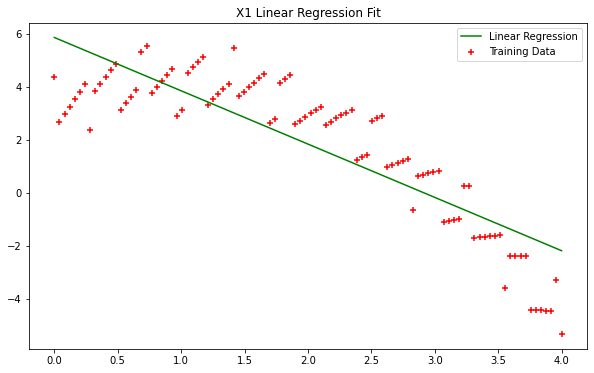

In [ ]:
theta = [0., 0.] 
iterations = 200; 
alpha = 0.1; #causes no visable change in cost for 0.01->0.1
theta, cost_history = gradient_descent(X__1, Y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history[0:10]) 

plt.scatter(X__1[:,1], Y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X__1[:,1],X__1.dot(theta), color='green', label='Linear Regression') 
plt.title('X1 Linear Regression Fit')
plt.legend()

Final value of theta = [0.68750341 0.57650645]
cost_history = [4.5369622  4.06234927 3.83409365 3.72418051 3.6711185  3.64537047
 3.6327483  3.62643665 3.62316171 3.6213508 ]


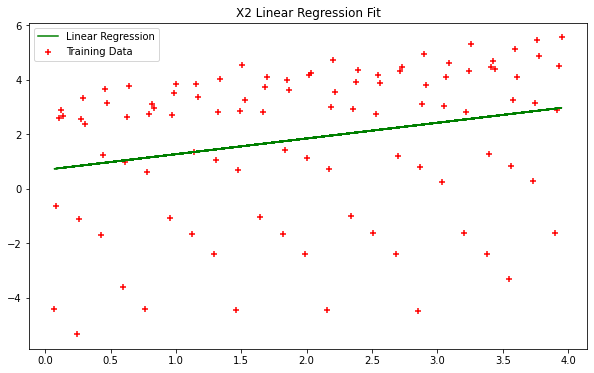

In [ ]:
theta = [0., 0.] 
iterations = 200; 
alpha = 0.01; #0.1 is lowest cost 
#end cost history remains same but gets to it much faster if the rate is 0.1 rather than lower 
theta, cost_history2 = gradient_descent(X__2, Y, theta, alpha, iterations) 
#
print('Final value of theta =', theta) 
print('cost_history =', cost_history2[0:10]) 

plt.scatter(X__2[:,1], Y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X__2[:,1],X__2.dot(theta), color='green', label='Linear Regression') 
plt.title('X2 Linear Regression Fit')
plt.legend()

Final value of theta = [ 2.84324442 -0.50933877]
cost_history = [4.66843939 4.49602325 4.43685075 4.39757676 4.3628731  4.3301743
 4.29900486 4.26923359 4.240788   4.21360745]


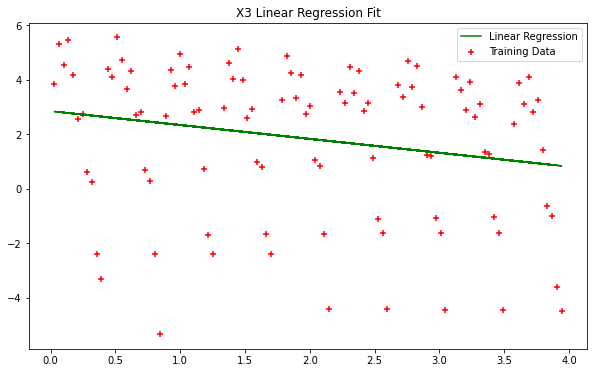

In [ ]:
theta = [0., 0.] 
iterations = 200; 
alpha = 0.1; #again lowest cost at 0.1
theta, cost_history3 = gradient_descent(X__3, Y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history3[0:10]) 

plt.scatter(X__3[:,1], Y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X__3[:,1],X__3.dot(theta), color='green', label='Linear Regression')
plt.title('X3 Linear Regression Fit') 
plt.legend()

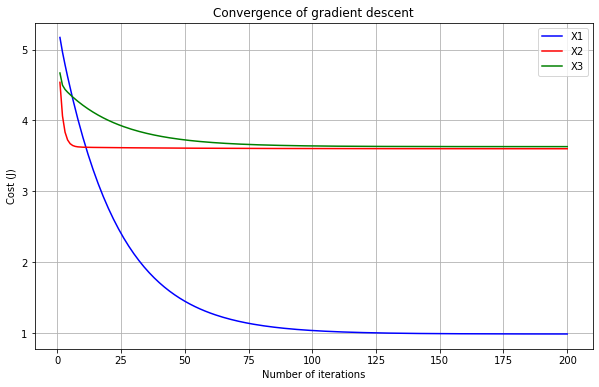

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='blue',label='X1') 
plt.plot(range(1, iterations + 1),cost_history2, color='red',label='X2') 
plt.plot(range(1, iterations + 1),cost_history3, color='green',label='X3') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()

The lowest cost by far is the when using X1 as the explanitory variable.

Based on the above data changeing the learning rate slows how fast the data will reach its lowest point but since there are no real false bottoms it will still reach the bottom regardless. Having the learning rate at highest allowable value of 0.1 will no cause it to jump over the bottom.


Problem 2

In [ ]:
X1 = dataset.iloc[:,0].values
X2 = dataset.iloc[:,1].values
X3 = dataset.iloc[:,2].values
X = np.append([X1],[X2,X3])
Y = dataset.iloc[:,3].values
#print(X)
m=len(Y)
theta = np.zeros(2)
X_0 = np.ones((300,1))
X_1 = X.reshape(300,1)
#print(X_1)
X = np.hstack((X_0,X_1))

Y1=Y
Y= np.append([Y],[Y1,Y1])
#print(Y)

cost = compute_cost(X, Y, theta) 
theta = [0., 0.] 
iterations = 200; 
alpha = 0.05; #0.01 is lowest cost 
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final value of theta =', theta) 
print('cost_history =', cost_history[0:10]) 

Final value of theta = [ 3.17439742 -0.66637501]
cost_history = [13.74899049 13.51839917 13.32175411 13.13817453 12.96665649 12.80640646
 12.65668418 12.51679802 12.38610179 12.26399175]


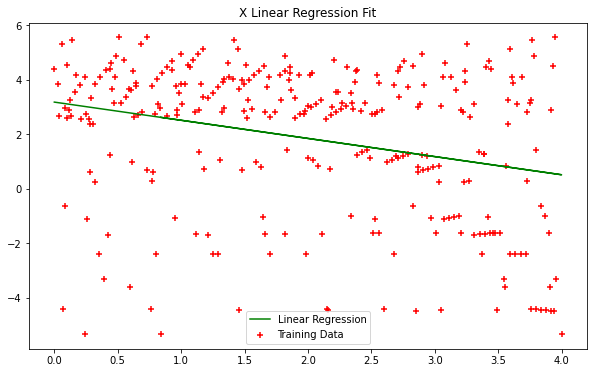

In [ ]:
plt.scatter(X[:,1], Y, color='red', marker= '+', label= 'Training Data') 
# plt.scatter(X[:,2], Y, color='red', marker= '+') 
# plt.scatter(X[:,3], Y, color='red', marker= '+') 

plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 
# plt.plot(X[:,2],X.dot(theta), color='green') 
# plt.plot(X[:,3],X.dot(theta), color='green') 
plt.title('X Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

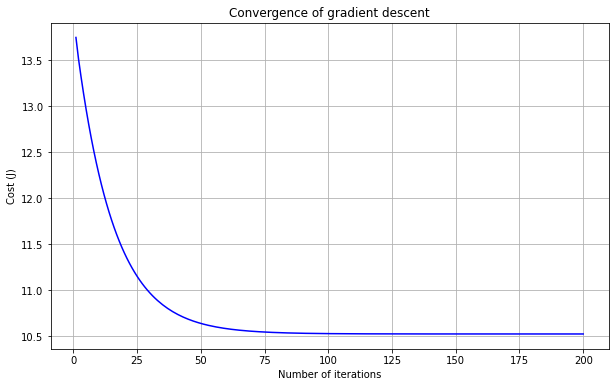

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

When tuning the training rate, the higher it is the faster it will reach its lowest cost. While for this data that is not a problem since it will not jump over the lowest point. So it is only to benifit to use the highest learning rate. Doing this will allow you to significantly lower your number of iterations allowing you to get to your final value much faster.